# Informação Adicional

Para calcular o intervalo de confiança de 95%, utilizamos a distribuição \( t \)-Student, apropriada para amostras com tamanho pequeno ou quando a variância populacional é desconhecida. A fórmula da margem de erro é:

$
\text{Margem de erro} = t_{0.975} \cdot \frac{\text{Desvio Padrão}}{\sqrt{n}}
$

Onde:
- $t_{0.975}$ é o valor crítico da distribuição \( t \)-Student para 95% de confiança, considerando \( n - 1 \) graus de liberdade.
- Desvio Padrão ($\sigma$) mede a variabilidade dos tempos de execução.
- \( n \) é o número de execuções realizadas para o tamanho do vetor.

O intervalo de confiança final é definido como:

$
\text{Intervalo de confiança} = \text{Média} \pm \text{Margem de erro}
$

Isso significa que, com 95% de confiança, o valor verdadeiro da média está dentro desse intervalo.


## Class Definitons

In [1]:
!pip install pytest pytest-sugar

In [2]:
%%file binarysearchtree.py
import plotly.graph_objs as go

class Node:
    """
    A class representing a node in a binary search tree.

    Attributes:
    - value: the value of the node
    - left_child: the left child of the node
    - right_child: the right child of the node
    """

    def __init__(self, value):
        """
        Initializes a new instance of the Node class.

        Args:
        - value: the value of the node
        """
        self.value = value
        self.left_child = None
        self.right_child = None


class BST:
    """
    A class representing a binary search tree.

    Attributes:
    - root: the root node of the tree
    """

    def __init__(self):
        """
        Initializes a new instance of the BST class.
        """
        self.root = None

    def add(self, value):
        """
        Adds a new node with the given value to the tree.

        Args:
        - value: the value of the node to add
        """
        if self.root is None:
            # The root does exist yet, create it
            self.root = Node(value)
        else:
            # Find the right place and insert new value
            self._add_recursive(self.root, value)

    def _add_recursive(self, current_node, value):
        """
        A helper method to recursively traverse the tree and find the correct position to add the new node.

        Args:
        - current_node: the current node to traverse
        - value: the value of the node to add
        """
        if value <= current_node.value:
            # Go to the left
            if current_node.left_child is None:
                current_node.left_child = Node(value)
            else:
                self._add_recursive(current_node.left_child, value)
        else:
            # Go to the right
            if current_node.right_child is None:
                current_node.right_child = Node(value)
            else:
                self._add_recursive(current_node.right_child, value)

    def _contains(self, current_node, value):
        """
        A helper method to recursively traverse the tree and find the node with the given value.

        Args:
        - current_node: the current node to traverse
        - value: the value to search for

        Returns:
        - True if a node with the given value is found, False otherwise
        """
        if current_node is None:
            return False
        if current_node.value == value:
            return True
        if value < current_node.value:
            return self._contains(current_node.left_child, value)
        return self._contains(current_node.right_child, value)

    def contains(self, value):
        """
        Checks whether a node with the given value is present in the tree.

        Args:
        - value: the value to search for

        Returns:
        - True if a node with the given value is found, False otherwise
        """
        return self._contains(self.root, value)

    def plot(self):
        """
        Plots the binary search tree using Plotly.
        """
        if self.root is None:
            print("The tree is empty!")
            return

        # Initialize lists for coordinates and connections
        node_coords = []
        lines = []

        # Helper function to traverse the tree and fill the coordinate and connection lists
        def _plot_recursive(node, x, y, offset):
            if node is not None:
                node_coords.append((x, y, node.value))
                if node.left_child is not None:
                    new_x = x - offset
                    new_y = y - 1
                    lines.append((x, y, new_x, new_y))
                    _plot_recursive(node.left_child, new_x, new_y, offset / 2)
                if node.right_child is not None:
                    new_x = x + offset
                    new_y = y - 1
                    lines.append((x, y, new_x, new_y))
                    _plot_recursive(node.right_child, new_x, new_y, offset / 2)

        # Traverse the tree starting from the root node
        _plot_recursive(self.root, x=0, y=0, offset=0.5)

        # Create a scatter plot for the nodes
        node_trace = go.Scatter(x=[x for x, y, _ in node_coords],
                                y=[y for _, y, _ in node_coords],
                                text=[str(val) for _, _, val in node_coords],
                                mode='markers+text',
                                textposition='top center',
                                marker=dict(symbol='circle',
                                            size=20,
                                            color='darkblue'))

        # Create a scatter plot for the connections between nodes
        line_trace = go.Scatter(x=sum([[x1, x2, None] for x1, y1, x2, y2 in lines], []),
                                y=sum([[y1, y2, None] for x1, y1, x2, y2 in lines], []),
                                mode='lines',
                                line=dict(color='black'))

        # Combine the two scatter plots
        layout = go.Layout(title='',
                           xaxis=dict(title='', showgrid=False, zeroline=False, showticklabels=False),
                           yaxis=dict(title='', showgrid=False, zeroline=False, showticklabels=False),
                           showlegend=False)

        fig = go.Figure(data=[node_trace, line_trace], layout=layout)
        fig.show()

Overwriting binarysearchtree.py


## Find closest helper function definition

In [3]:
def solver_closestInBstHelper(node, target, closest):
    if node is None:
        return closest
    if abs(target - closest) > abs(target - node.value):
        closest = node.value
    if target < node.value:
        return solver_closestInBstHelper(node.left_child, target, closest)
    elif target > node.value:
        return solver_closestInBstHelper(node.right_child, target, closest)
    else:
        return closest

## Solver_kth largest helper function definition

In [4]:
def inOrderTraverse(node, sortedNodeValues):
    if node is None:
        return

    inOrderTraverse(node.left_child, sortedNodeValues)
    sortedNodeValues.append(node.value)
    inOrderTraverse(node.right_child, sortedNodeValues)

## Codes benchmark

In [5]:
#from binarysearchtree import *
# Example usage:
#bst = BST()
#for value in [5, 3, 1, 0, 2, 4, 7, 6, 8]:
#    bst.add(value)
# bst.plot()

tcls [1.5735626220703125e-05]
tcls [1.5735626220703125e-05, 1.33514404296875e-05]
tcls [1.5735626220703125e-05, 1.33514404296875e-05, 1.1682510375976562e-05]
tcls [1.5735626220703125e-05, 1.33514404296875e-05, 1.1682510375976562e-05, 1.0967254638671875e-05]
tcls [1.5735626220703125e-05, 1.33514404296875e-05, 1.1682510375976562e-05, 1.0967254638671875e-05, 9.298324584960938e-06]
tcls [3.5762786865234375e-05]
tcls [3.5762786865234375e-05, 5.435943603515625e-05]
tcls [3.5762786865234375e-05, 5.435943603515625e-05, 4.935264587402344e-05]
tcls [3.5762786865234375e-05, 5.435943603515625e-05, 4.935264587402344e-05, 4.482269287109375e-05]
tcls [3.5762786865234375e-05, 5.435943603515625e-05, 4.935264587402344e-05, 4.482269287109375e-05, 4.673004150390625e-05]
tcls [2.002716064453125e-05]
tcls [2.002716064453125e-05, 2.8371810913085938e-05]
tcls [2.002716064453125e-05, 2.8371810913085938e-05, 3.1948089599609375e-05]
tcls [2.002716064453125e-05, 2.8371810913085938e-05, 3.1948089599609375e-05, 3.6

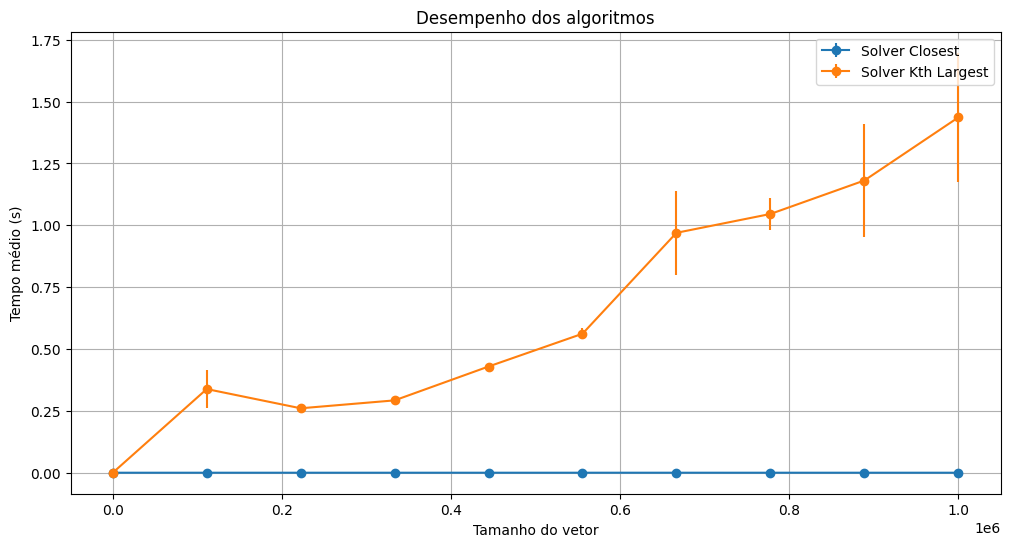

In [6]:
import numpy as np
import sys
from binarysearchtree import *
import matplotlib.pyplot as plt
from time import time
from scipy.stats import t

sys.setrecursionlimit(10**6)

# Funções fake para simular os algoritmos
def solver_closest(tree, target):
    """
    Finds the value in a binary search tree that is closest to the given target value.

    This function begins the search for the closest value from the root of the binary search tree.
    It works by recursively (or sequentialy) exploring the tree, narrowing down the search based on the target value
    and the current node's value. The closest value is constantly updated throughout the search process.

    Parameters:
    tree (BinarySearchTree): The binary search tree object in which to find the closest value.
                             It is expected to have a 'root' attribute that points to the root node of the tree.
    target (int or float): The target value for which the closest value in the binary search tree is sought.

    Returns:
    int or float: The value in the binary search tree that is closest to the target value.
    """
    return solver_closestInBstHelper(tree.root, target, tree.root.value)


def solver_kth_largest(tree, k):
    """
    Finds the kth largest integer in a Binary Search Tree (BST).

    The function traverses the BST in an in-order manner to collect the node values in a sorted list.
    It then returns the kth largest value from this list. The BST is assumed to contain only integer values.
    In case of duplicate integers, they are treated as distinct values.
    The kth largest integer is determined in the context of these distinct values.

    Parameters:
    tree (BST): the Binary Search Tree (BST).
    k (int): A positive integer representing the kth position.

    Returns:
    int: The kth largest integer present in the BST.
    """

    sortedNodeValues = []
    inOrderTraverse(tree.root,sortedNodeValues)
    return sortedNodeValues[len(sortedNodeValues) - k]

# Configurações
np.random.seed(42)
N = 1000000  # Tamanho máximo do vetor
steps = 10  # Número de tamanhos de vetor a testar
executions_per_size = 5  # Número de execuções por tamanho de vetor

# Tamanhos dos vetores a testar
vector_sizes = np.linspace(100, N, steps, dtype=int)

# Preparação para coleta de dados
results_closest = []
results_kth_largest = []
confidence_intervals_closest = []
confidence_intervals_kth_largest = []

# Testar os algoritmos
for size in vector_sizes:
    times_closest = []
    times_kth_largest = []

    data = np.random.randint(0, 1000, size)
    #print("size: ", size, " len(data): ", len(data), " -- ", data)

    bst = BST()
    for value in data:
        bst.add(value)

    for _ in range(executions_per_size):
        #print("for: ", _)

        # Medir tempo para solver_closest
        start = time()
        cls = solver_closest(bst, 333)
        times_closest.append(time() - start)
        print("tcls", times_closest)

        # Medir tempo para solver_kth_largest
        start = time()
        solver_kth_largest(bst, k=5)
        times_kth_largest.append(time() - start)

    # Calcular médias e intervalos de confiança (95%)
    mean_closest = np.mean(times_closest)
    mean_kth_largest = np.mean(times_kth_largest)
    std_closest = np.std(times_closest, ddof=1)
    std_kth_largest = np.std(times_kth_largest, ddof=1)
    ci_closest = t.ppf(0.975, executions_per_size-1) * (std_closest / np.sqrt(executions_per_size))
    ci_kth_largest = t.ppf(0.975, executions_per_size-1) * (std_kth_largest / np.sqrt(executions_per_size))

    results_closest.append(mean_closest)
    results_kth_largest.append(mean_kth_largest)
    confidence_intervals_closest.append(ci_closest)
    confidence_intervals_kth_largest.append(ci_kth_largest)

# Gerar gráfico
plt.figure(figsize=(12, 6))
plt.errorbar(vector_sizes, results_closest, yerr=confidence_intervals_closest, label='Solver Closest', fmt='-o')
plt.errorbar(vector_sizes, results_kth_largest, yerr=confidence_intervals_kth_largest, label='Solver Kth Largest', fmt='-o')
plt.xlabel('Tamanho do vetor')
plt.ylabel('Tempo médio (s)')
plt.title('Desempenho dos algoritmos')
plt.legend()
plt.grid(True)
plt.savefig('Time_Complexity.png')
plt.show()

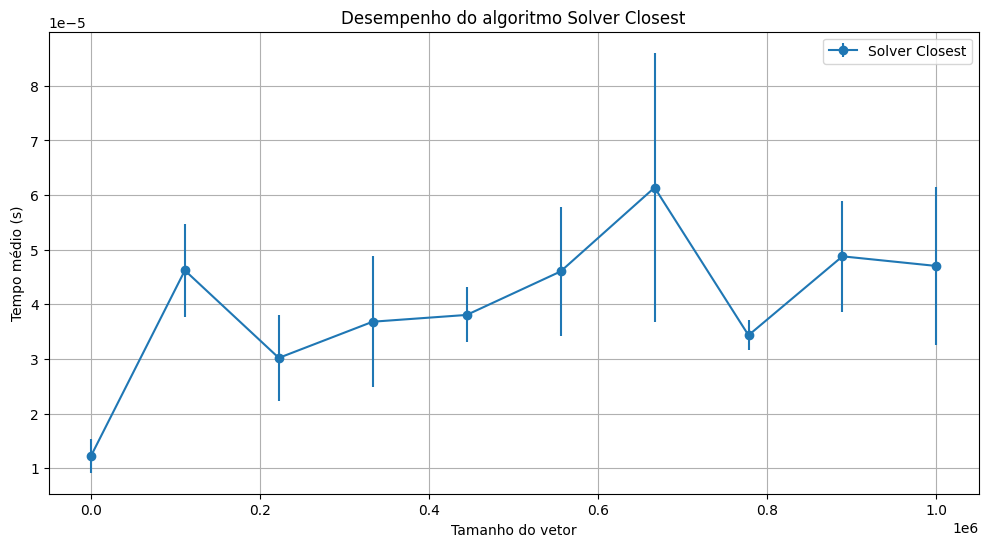

In [11]:
# prompt: faça om gráfico de evolução como o de cima usando somente os dados do vetor results_closest para melhor visualização da curva

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'vector_sizes', 'results_closest', and 'confidence_intervals_closest' are defined from the previous code

plt.figure(figsize=(12, 6))
plt.errorbar(vector_sizes, results_closest, yerr=confidence_intervals_closest, label='Solver Closest', fmt='-o')
plt.xlabel('Tamanho do vetor')
plt.ylabel('Tempo médio (s)')
plt.title('Desempenho do algoritmo Solver Closest')
plt.legend()
plt.grid(True)
plt.show()

## Tests

### Solver closest

In [7]:
%%file closestvalue.py
import pytest
from binarysearchtree import *

def solver_closest(tree, target):
    """
    Finds the value in a binary search tree that is closest to the given target value.

    This function begins the search for the closest value from the root of the binary search tree.
    It works by recursively (or sequentialy) exploring the tree, narrowing down the search based on the target value
    and the current node's value. The closest value is constantly updated throughout the search process.

    Parameters:
    tree (BinarySearchTree): The binary search tree object in which to find the closest value.
                             It is expected to have a 'root' attribute that points to the root node of the tree.
    target (int or float): The target value for which the closest value in the binary search tree is sought.

    Returns:
    int or float: The value in the binary search tree that is closest to the target value.
    """
    return solver_closestInBstHelper(tree.root, target, tree.root.value)

def solver_closestInBstHelper(node, target, closest):
    if node is None:
        return closest
    if abs(target - closest) > abs(target - node.value):
        closest = node.value
    if target < node.value:
        return solver_closestInBstHelper(node.left_child, target, closest)
    elif target > node.value:
        return solver_closestInBstHelper(node.right_child, target, closest)
    else:
        return closest

@pytest.fixture(scope="session")
def data():

    array = [[10, 5, 15, 13, 22, 14, 2, 5, 1],
             [100,5,502,204,55000,1001,4500,203,205,207,
              206,208,2,15,5,22,57,60,1,3,-51,1,1,1,1,1,-403]
             ]
    return array

def test_1(data):
    bst = BST()
    for value in data[0]:
      bst.add(value)
    assert solver_closest(bst, 12) == 13

def test_2(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert solver_closest(bst, 100) == 100

def test_3(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert solver_closest(bst, 208) == 208

def test_4(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert solver_closest(bst, 4500) == 4500

def test_5(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert solver_closest(bst, 4501) == 4500

def test_6(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert solver_closest(bst, -70) == -51

def test_7(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert solver_closest(bst, 2000) == 1001

def test_8(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert solver_closest(bst, 6) == 5

def test_9(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert solver_closest(bst, 30000) == 55000

def test_10(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert solver_closest(bst, -1) == 1

def test_11(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert solver_closest(bst, 29751) == 55000

def test_12(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert solver_closest(bst, 29749) == 4500

Overwriting closestvalue.py


In [8]:
!pytest closestvalue.py -vv

Test session starts (platform: linux, Python 3.10.12, pytest 8.3.4, pytest-sugar 1.0.0)
cachedir: .pytest_cache
rootdir: /content
plugins: sugar-1.0.0, typeguard-4.4.1, anyio-3.7.1
collected 12 items                                                                                 

 closestvalue.py::test_1 ✓                                                             8% ▉         
 closestvalue.py::test_2 ✓                                                            17% █▋        
 closestvalue.py::test_3 ✓                                                            25% ██▌       
 closestvalue.py::test_4 ✓                                                            33% ███▍      
 closestvalue.py::test_5 ✓                                                            42% ████▎     
 closestvalue.py::test_6 ✓                                                            50% █████     
 closestvalue.py::test_7 ✓                                                            58% █████▉    
 closestval

### Solver_kth largest

In [9]:
%%file kth_largest.py
import pytest
from binarysearchtree import *

def solver_kth_largest(tree, k):
    """
    Finds the kth largest integer in a Binary Search Tree (BST).

    The function traverses the BST in an in-order manner to collect the node values in a sorted list.
    It then returns the kth largest value from this list. The BST is assumed to contain only integer values.
    In case of duplicate integers, they are treated as distinct values.
    The kth largest integer is determined in the context of these distinct values.

    Parameters:
    tree (BST): the Binary Search Tree (BST).
    k (int): A positive integer representing the kth position.

    Returns:
    int: The kth largest integer present in the BST.
    """

    sortedNodeValues = []
    inOrderTraverse(tree.root,sortedNodeValues)
    return sortedNodeValues[len(sortedNodeValues) - k]

def inOrderTraverse(node, sortedNodeValues):
    if node is None:
        return

    inOrderTraverse(node.left_child, sortedNodeValues)
    sortedNodeValues.append(node.value)
    inOrderTraverse(node.right_child, sortedNodeValues)


@pytest.fixture(scope="session")
def data():

    array = [[15,5,20,17,22,2,5,1,3],
             [5,4,6,3,7],
             [5],
             [20,15,25,10,19,21,30,22],
             [1,2,3,4,5],
             [10,8,6,4,2],
             [10,8,6,9,4,7,2,5,3],
             [99727,99,727],
             [15,5,20,17,22,24,23,25,2,5,1,3],
             [15,5,20,17,22,2,5,1,3],
             [15,5,20,17,22,2,5,1,3]
             ]
    return array

def test_1(data):
    bst = BST()
    for value in data[0]:
      bst.add(value)
    assert solver_kth_largest(bst, 3) == 17

def test_2(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert solver_kth_largest(bst, 1) == 7

def test_3(data):
    bst = BST()
    for value in data[2]:
      bst.add(value)
    assert solver_kth_largest(bst, 1) == 5

def test_4(data):
    bst = BST()
    for value in data[3]:
      bst.add(value)
    assert solver_kth_largest(bst, 3) == 22

def test_5(data):
    bst = BST()
    for value in data[4]:
      bst.add(value)
    assert solver_kth_largest(bst, 5) == 1

def test_6(data):
    bst = BST()
    for value in data[5]:
      bst.add(value)
    assert solver_kth_largest(bst, 2) == 8

def test_7(data):
    bst = BST()
    for value in data[6]:
      bst.add(value)
    assert solver_kth_largest(bst, 5) == 6

def test_8(data):
    bst = BST()
    for value in data[7]:
      bst.add(value)
    assert solver_kth_largest(bst, 1) == 99727

def test_9(data):
    bst = BST()
    for value in data[8]:
      bst.add(value)
    assert solver_kth_largest(bst, 7) == 15

def test_10(data):
    bst = BST()
    for value in data[9]:
      bst.add(value)
    assert solver_kth_largest(bst, 5) == 5

def test_11(data):
    bst = BST()
    for value in data[10]:
      bst.add(value)
    assert solver_kth_largest(bst, 6) == 5

Overwriting kth_largest.py


In [10]:
!pytest kth_largest.py -vv

Test session starts (platform: linux, Python 3.10.12, pytest 8.3.4, pytest-sugar 1.0.0)
cachedir: .pytest_cache
rootdir: /content
plugins: sugar-1.0.0, typeguard-4.4.1, anyio-3.7.1
collected 11 items                                                                                 

 kth_largest.py::test_1 ✓                                                              9% ▉         
 kth_largest.py::test_2 ✓                                                             18% █▊        
 kth_largest.py::test_3 ✓                                                             27% ██▊       
 kth_largest.py::test_4 ✓                                                             36% ███▋      
 kth_largest.py::test_5 ✓                                                             45% ████▋     
 kth_largest.py::test_6 ✓                                                             55% █████▌    
 kth_largest.py::test_7 ✓                                                             64% ██████▍   
 kth_larges